<a href="https://cognitiveclass.ai"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width = 400> </a>

<h1 align=center><font size = 5>Peer Review Final Assignment</font></h1>

## Introduction


In this lab, you will build an image classifier using the VGG16 pre-trained model, and you will evaluate it and compare its performance to the model we built in the last module using the ResNet50 pre-trained model. Good luck!

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

1. <a href="#item41">Download Data 
2. <a href="#item42">Part 1</a>
3. <a href="#item43">Part 2</a>  
4. <a href="#item44">Part 3</a>  

</font>
    
</div>

<a id="item41"></a>

## Download Data

Use the <code>wget</code> command to download the data for this assignment from here: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

Use the following cells to download the data.

After you unzip the data, you fill find the data has already been divided into a train, validation, and test sets.

<a id="item42"></a>

## Part 1

In this part, you will design a classifier using the VGG16 pre-trained model. Just like the ResNet50 model, you can import the model <code>VGG16</code> from <code>keras.applications</code>.

You will essentially build your classifier as follows:
1. Import libraries, modules, and packages you will need. Make sure to import the *preprocess_input* function from <code>keras.applications.vgg16</code>.
2. Use a batch size of 100 images for both training and validation.
3. Construct an ImageDataGenerator for the training set and another one for the validation set. VGG16 was originally trained on 224 × 224 images, so make sure to address that when defining the ImageDataGenerator instances.
4. Create a sequential model using Keras. Add VGG16 model to it and dense layer.
5. Compile the mode using the adam optimizer and the categorical_crossentropy loss function.
6. Fit the model on the augmented data using the ImageDataGenerators.

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import numpy as np

Use the following cells to create your classifier.

In [2]:
#DECLARE GENERATORS
img_size = 224
batch_size = 100

data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

train_gen = data_generator.flow_from_directory(
    '../concrete_data_week4/train',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical')

val_gen = data_generator.flow_from_directory(
    '../concrete_data_week4/valid',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical')

Found 30001 images belonging to 2 classes.
Found 9501 images belonging to 2 classes.


In [3]:
#DECLARE MODEL
model = Sequential()

model.add(VGG16(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))

model.add(Dense(2, activation='softmax'))

model.layers[0].trainable = False   #TURN OFF ANY MODIFICATIONS TO PARAMETERS SINCE IT IS A PRETRAINED MODEL

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense (Dense)               (None, 2)                 1026      
                                                                 
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


In [6]:
steps_per_epoch_training = len(train_gen)
steps_per_epoch_validation = len(val_gen)
num_epochs = 2

#START TRAINING
history = model.fit_generator(
    train_gen,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=val_gen,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)

Epoch 1/2
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


C:\Users\Hush\AppData\Local\Temp\ipykernel_15444\3805441926.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


301/301 [==============================] - ETA: 0s - loss: 0.1177 - accuracy: 0.9574WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002445870F490> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
301/301 [==============================] - 2089s 7s/step - loss: 0.1177 - accuracy: 0.9574 - val_loss: 0.0264 - val_accuracy: 0.9936
Epoch 2/2
301/301 [=====

In [7]:
#SAVE FOR BACKUP JUST IN CASE
model.save('classifier_vgg.h5')

## Part 2

In this part, you will evaluate your deep learning models on a test data. For this part, you will need to do the following:

1. Load your saved model that was built using the ResNet50 model. 
2. Construct an ImageDataGenerator for the test set. For this ImageDataGenerator instance, you only need to pass the directory of the test images, target size, and the **shuffle** parameter and set it to False.
3. Use the **evaluate_generator** method to evaluate your models on the test data, by passing the above ImageDataGenerator as an argument. You can learn more about **evaluate_generator** [here](https://keras.io/models/sequential/).
4. Print the performance of the classifier using the VGG16 pre-trained model.
5. Print the performance of the classifier using the ResNet pre-trained model.


Use the following cells to evaluate your models.

In [8]:
from keras.models import load_model

#LOAD RESNET MODEL
model_res = load_model('classifier_resnet_model.h5')

#LOAD VGG MODEL
# model = load_model('classifier_vgg.h5')

test_data_generator = ImageDataGenerator()

#TEST DATA GENERATOR
test_gen = test_data_generator.flow_from_directory(
    '../concrete_data_week4/test',
    target_size=(img_size, img_size),
    shuffle=False
)

Found 500 images belonging to 2 classes.


In [10]:
#EVALUATE ON TEST DATA
scores_res = model_res.evaluate(test_gen)
print("%s%s: %.2f%%" % ("RESNET50 ",model_res.metrics_names[1], scores_res[1]*100))

scores_vgg = model.evaluate(test_gen)
print("%s%s: %.2f%%" % ("VGG16 ",model.metrics_names[1], scores_vgg[1]*100))

16/16 [==============================] - 12s 739ms/step - loss: 0.1003 - accuracy: 0.9640
RESNET50 accuracy: 96.40%
16/16 [==============================] - 26s 2s/step - loss: 0.2051 - accuracy: 0.9200
VGG16 accuracy: 92.00%


***LOWER ACCURACY WHEN USING VGG16, BUT STILL ABOVE 90%***

<a id="item44"></a>

## Part 3

In this model, you will predict whether the images in the test data are images of cracked concrete or not. You will do the following:

1. Use the **predict_generator** method to predict the class of the images in the test data, by passing the test data ImageDataGenerator instance defined in the previous part as an argument. You can learn more about the **predict_generator** method [here](https://keras.io/models/sequential/).
2. Report the class predictions of the first five images in the test set. You should print something list this:

<center>
    <ul style="list-style-type:none">
        <li>Positive</li>  
        <li>Negative</li> 
        <li>Positive</li>
        <li>Positive</li>
        <li>Negative</li>
    </ul>
</center>

Use the following cells to make your predictions.

In [13]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [12]:
_RES_DICT = {1:'Positive', 0 :'Negative'}

def show_five(result):
    print(classification_report(test_gen.classes, result))
    #RESET GENERATOR
    test_gen.reset()

    _MAX = 5

    neg = 0
    pos = 0

    fig, axes = plt.subplots(2, _MAX, figsize=(16, 9))

    img_batch = []

    result = list(result)

    while True:
        #CHECK NEXT ITEMS
        if not len(img_batch):
            img_batch = list(test_gen.next()[0])
        img = img_batch.pop(0)
        res_next = result.pop(0)

        #SHOW FIRST FIVE OF NEGATIVE AND POSITIVE ONLY
        if not res_next and neg >= _MAX:
            continue

        if res_next and pos >= _MAX:
            continue

        #POSITIVE PREDICTIONS ARE AT THE BOTTOM
        j = pos if res_next else neg
        ax = axes[res_next, j]
        
        ax.imshow(img.astype(np.uint8))
        
        # Set a title to identify the subplot
        ax.set_title(f'prediction: {_RES_DICT[res_next]}')

        pos = pos + 1 if res_next else pos
        neg = neg + 1 if not res_next else neg

        if neg + pos >= _MAX*2 or not len(result):
            plt.show()
            return


### RESNET50 PREDICTIONS

16/16 [==============================] - 12s 747ms/step
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       250
           1       1.00      0.93      0.96       250

    accuracy                           0.96       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.97      0.96      0.96       500



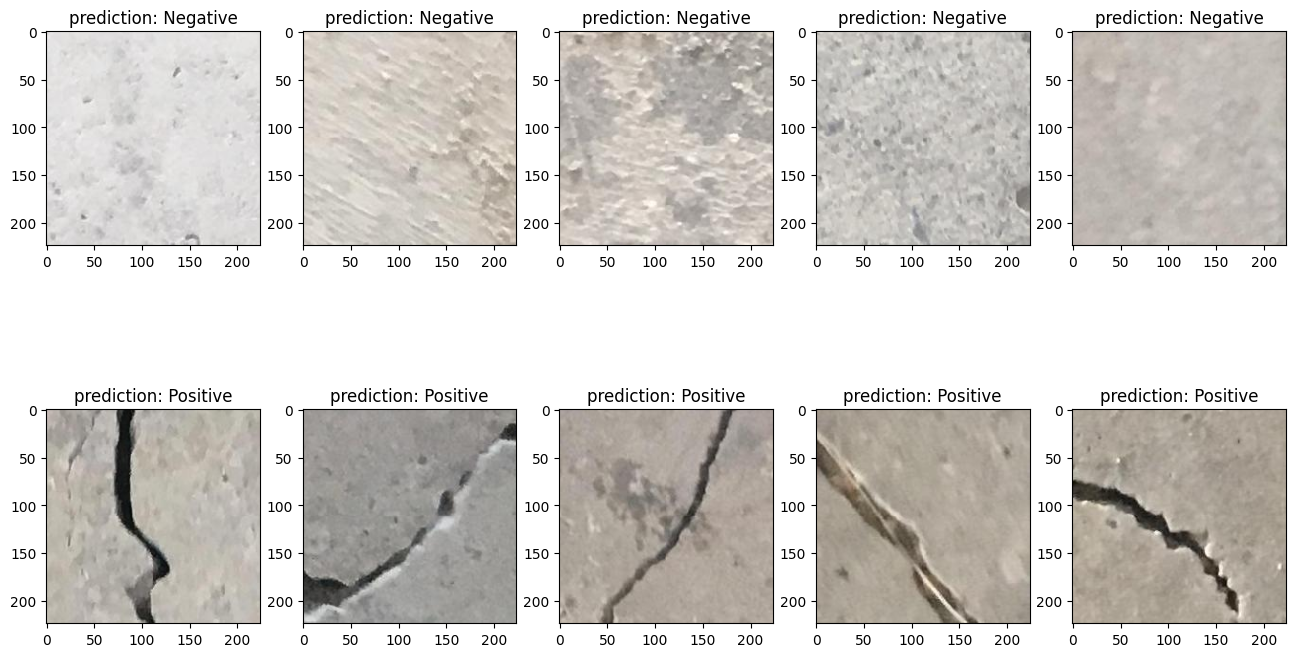

In [14]:
#RESNET MODEL RESULTS
y_pred_res = model_res.predict(test_gen)
y_pred_res = np.argmax(y_pred_res, axis=-1)
show_five(y_pred_res)

### VGG16 PREDICTIONS

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
16/16 [==============================] - 27s 2s/step
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       250
           1       1.00      0.84      0.91       250

    accuracy                           0.92       500
   macro avg       0.93      0.92      0.92       500
weighted avg       0.93      0.92      0.92       500



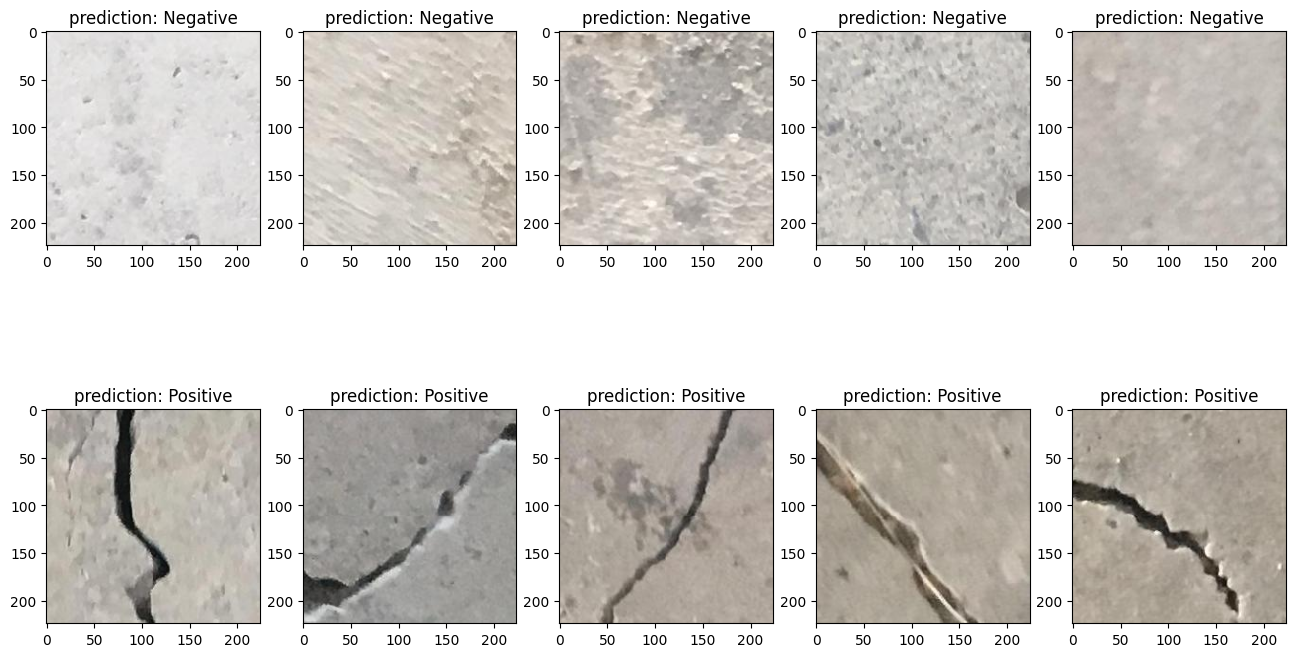

In [15]:
#VGG MODEL RESULTS
y_pred_vgg = model.predict(test_gen)
y_pred_vgg = np.argmax(y_pred_vgg, axis=-1)
show_five(y_pred_vgg)

### Thank you for completing this lab!

This notebook was created by Alex Aklson.

This notebook is part of a course on **Coursera** called *AI Capstone Project with Deep Learning*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0321EN_Coursera_Week4_LAB1).

<hr>

Copyright &copy; 2020 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).